In [1]:
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Cargar la capa temática
natalidad = "hospital_lima.json"
map_data = gpd.read_file(natalidad)
hospitales=map_data
map_data.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_full,operator,water_source,changeset_id,...,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,geometry
0,338350659,way,20.0,,hospital,oncology,,MINSA,,80278687.0,...,Instituto Nacioanal de Enfermedades Neoplásicas,,CamelCaseNick,,,,,,,"POLYGON ((-76.99985 -12.11232, -76.99984 -12.1..."
1,6852754574,node,13.0,,hospital,,,Gobierno Regional,,75304307.0,...,Nac. Daniel A. Carrion,,karitotp_peruimport,,,,,,,POINT (-77.12481 -12.06379)
2,604765913,way,27.0,,hospital,general,,Municipalidad Metropolitana de Lima,,71603113.0,...,SISOL Salud Amancaes,,BikeRoad,yes,,,,hospital,,"POLYGON ((-77.03081 -12.01708, -77.03048 -12.0..."
3,1846294778,node,10.0,,hospital,,,,,16939359.0,...,Centro de Salud Bahia Blanca,,olgr22,,,,,,,POINT (-77.15870 -11.83530)
4,431592740,way,24.0,,hospital,general,,ESSALUD,,65456273.0,...,Hospital III Suarez Angamos,,Diego Sanguinetti,,,,,,,"POLYGON ((-77.02822 -12.11326, -77.02818 -12.1..."


In [2]:
import pandas as pd
h1 = hospitales[hospitales['operator'] == 'MINSA']
h2 = hospitales[hospitales['operator'] == 'ESSALUD' ]
hospital= pd.concat([h1, h2])
hospital.osm_id

0       338350659
7       465231306
8      4458459045
14       39557243
23      372661035
29     4435018834
42      320125239
44      565936062
48      568396654
52     4430998394
54      412486776
59     4286965190
74      618688385
76      320413708
78      320415894
84      172600382
91      549170909
95     4458459045
96      185197319
99     4557320590
100     118291969
108    4235527198
109     187076624
116     419918941
118    4023439900
122     525919060
135     450688741
140     160691934
148     393487901
149     483500696
152     442795790
153     406620279
162    4029952232
4       431592740
9       126861263
16      437642241
34       39413837
36      611484237
43      111800007
103     291986361
124    3358845693
139    1846295645
141    4552742992
142     777346011
143     450128393
150     117005900
157     517495828
Name: osm_id, dtype: int64

In [3]:
map_data=hospital

In [4]:
#descargar API overpass
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "Lima,Peru"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name, network_type='drive', which_result=1)
type(graph)
ciudad=""
s=1
for i in range(len(place_name)):
   if place_name[i]!=',' and s==1:
        ciudad+=place_name[i]
   if place_name[i]==',':
        s=2
print(ciudad)

Lima


In [5]:
nodes, edges = ox.graph_to_gdfs(graph)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
len(nodes)

Nodes:
                     y          x       osmid highway  ref  \
1273610289 -12.053850 -77.078979  1273610289     NaN  NaN   
1624735795 -12.059370 -77.074970  1624735795     NaN  NaN   
1624735796 -12.061101 -77.074574  1624735796     NaN  NaN   
263405660  -12.074301 -77.034839   263405660     NaN  NaN   
1830379614 -12.048170 -77.042775  1830379614     NaN  NaN   

                               geometry  
1273610289  POINT (-77.07898 -12.05385)  
1624735795  POINT (-77.07497 -12.05937)  
1624735796  POINT (-77.07457 -12.06110)  
263405660   POINT (-77.03484 -12.07430)  
1830379614  POINT (-77.04278 -12.04817)   

Edges:
             u           v  key      osmid                            name  \
0  1273610289  1475218848    0  111888580  Jirón Ricardo Rivera Navarrete   
1  1273610289  1273734897    0  420679867               Mariano Arredondo   
2  1273610289  1397486926    0  420679867               Mariano Arredondo   
3  1273610289  1397486923    0  111888580  Jirón Ricard

2511

In [6]:
#place_name = "Lima,Peru"
area = ox.gdf_from_place(place_name)
print(type(area))


<class 'geopandas.geodataframe.GeoDataFrame'>


Grafico


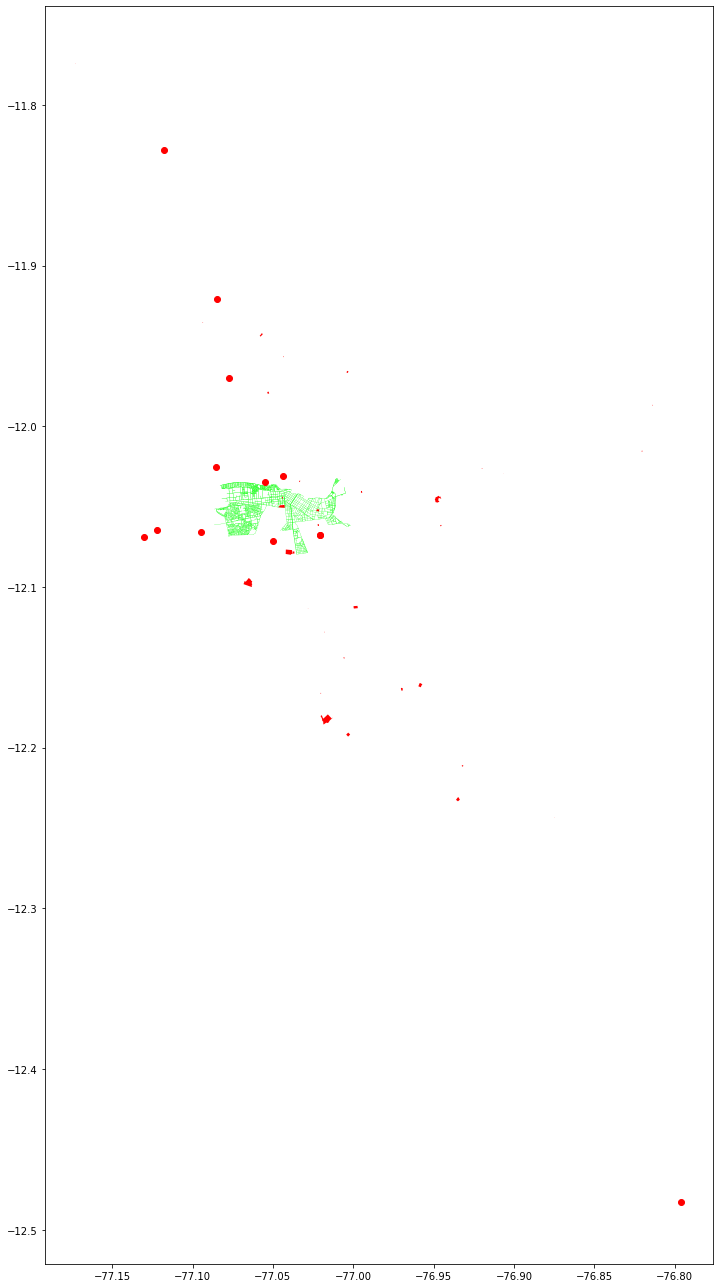

In [7]:

ax = area.plot(facecolor='white',figsize=(18,18))
# Plot street edges
edges.plot(ax=ax, linewidth=0.2,  edgecolor='lime', zorder=1)
# lightskyblue,  markersize=20
# Plot restaurants
print('Grafico')
map_data.plot(ax=ax, color='red', zorder=2)
plt.tight_layout()
#plt.show()
plt.savefig("LimaHosp.tiff")
#fig, ax = ox.plot_graph(ax, fig_height=10, fig_width=12) 

In [8]:

map_data['geometry'] = map_data['geometry'].centroid
map_data.head()
#print(coords)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_full,operator,water_source,changeset_id,...,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,geometry
0,338350659,way,20.0,,hospital,oncology,,MINSA,,80278687.0,...,Instituto Nacioanal de Enfermedades Neoplásicas,,CamelCaseNick,,,,,,,POINT (-76.99853 -12.11259)
7,465231306,way,13.0,,hospital,,,MINSA,,78908832.0,...,Centro de Salud Materno Infantil Ancon,,benjymb,,,,,,,POINT (-77.17279 -11.77449)
8,4458459045,node,17.0,,hospital,,,MINSA,,78167488.0,...,Centro de Salud Infantil El Porvenir,,karitotp_peruimport,,,,,,,POINT (-77.02091 -12.06746)
14,39557243,way,17.0,,hospital,,,MINSA,,81597304.0,...,Hospital Víctor Larco Herrera,,ovruni,,,,,,,POINT (-77.06517 -12.09743)
23,372661035,way,20.0,,hospital,general,,MINSA,,66086812.0,...,Hospital de Emergencias Villa El Salvador,,ovruni,,,,,,,POINT (-76.93484 -12.23215)


In [9]:
import numpy as np
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib as mpl
import smopy
%matplotlib inline
a=map_data['amenity']
o=map_data['operator']
n=map_data['name']

In [10]:
coords=map_data['geometry']
import fiona
from shapely.geometry import shape
import numpy as np
listarray=[]
x1=[]
y1=[]
for pp in coords:
    listarray.append([pp.x, pp.y])
    x1.append([pp.x])
    y1.append([pp.y])
nparray = np.array(listarray)
coord=nparray

In [11]:
x1 = pd.DataFrame(x1)   
y1 = pd.DataFrame(y1)  
n1 = pd.DataFrame(n)
o1 = pd.DataFrame(o)
a1 = pd.DataFrame(a)
x1=pd.DataFrame(x1.values, columns = ["x"])
y1=pd.DataFrame(y1.values, columns = ["y"])
x2=pd.concat([x1, y1],axis=1)
a2=pd.concat([n1, o1,a1],axis=1)

In [12]:
a2=a2.reset_index(drop=True)    
 
co=pd.concat([x2, a2], axis=1, ignore_index=False)


In [13]:
metro=co
metro[metro.columns[0:]].tail(3)

,x,y,name,operator,amenity
44,-77.037148,-12.078581,Complejo Hospitalario Arenales,ESSALUD,hospital
45,-76.945506,-12.061828,Hospital Alcántara,ESSALUD,hospital
46,-76.947592,-12.045399,Hospital Jorge Voto Bernales,ESSALUD,hospital


In [14]:
metro.rename(columns={'x': 1, 'y': 2, 'name': 3, 'operator': 4, 'amenity': 5}, inplace=True)
metro[metro.columns[0:]].tail(10)

,1,2,3,4,5
37,-77.094460,-12.065842,Policlinico Octavio Mongrut,ESSALUD,hospital
38,-77.057228,-11.943168,Hospital Mariano Molina,ESSALUD,hospital
39,-77.044044,-12.044445,Policlínico Ramón Castilla,ESSALUD,hospital
40,-77.130419,-12.068634,Centro de Asistencia CAP III Metropolitano,ESSALUD,hospital
41,-77.122300,-12.064536,Hospital Alberto Sabogal Sologuren,ESSALUD,hospital
42,-77.049835,-12.071483,UBAB Jesús María,ESSALUD,hospital
43,-77.121949,-12.064476,Hospital Alberto Sabogal Sologuren,ESSALUD,hospital
44,-77.037148,-12.078581,Complejo Hospitalario Arenales,ESSALUD,hospital
45,-76.945506,-12.061828,Hospital Alcántara,ESSALUD,hospital
46,-76.947592,-12.045399,Hospital Jorge Voto Bernales,ESSALUD,hospital


In [15]:
# We only extract the district from stations in Paris.
paris = metro[4].str.startswith('SA').values
# We create a vector of integers with the district
# number of the corresponding station, or 0 if the
# station is not in Paris.
districts = np.zeros(len(paris), dtype=np.int32)
districts[paris] = metro[4][paris].str.slice(6, 8) \
    .astype(np.int32)
districts[~paris] = 0
ndistricts = districts.max() + 1

In [16]:
lon = metro[1]
lat = metro[2]

In [17]:
m=np.amin(lon)
minsur=np.amin(lat)
minoeste=np.amin(lon)
maxnorte=np.amax(lat)
maxeste=np.amax(lon)
print(minsur,minoeste, maxnorte, maxeste)

-12.48287867532872 -77.17278871039244 -11.774491564641929 -76.79625411880151


Lowered zoom level to keep map size reasonable. (z = 10)


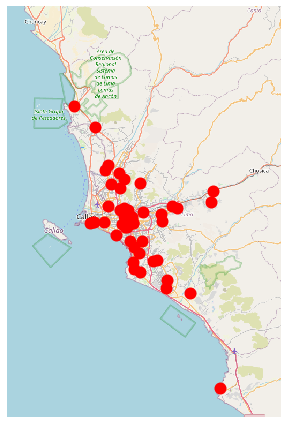

In [18]:

box = (np.amin(lat), np.amin(lon),
       np.amax(lat), np.amax(lon))
offsets = coord
#ax.scatter(lon, lat, s=30, c='r', alpha=0.5) 
#plt.scatter (x, y, s = area, c = colors, alpha = 0.5 )

m = smopy.Map(box, z=12)
x, y = m.to_pixels(lat, lon)
ax = m.show_mpl(figsize=(8, 6))
ax.plot(x, y, 'or', ms=10, mew=2);
#ax.scatter(metro.iloc[:,1], metro.iloc[:,0],s=30, alpha=0.5, c='r') 
#m.show_ipython()

In [19]:
vor = spatial.Voronoi(np.c_[lat, lon])

In [20]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """Reconstruct infinite Voronoi regions in a
    2D diagram to finite regions.
    Source:
    [https://stackoverflow.com/a/20678647/1595060](https://stackoverflow.com/a/20678647/1595060)
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()
    # Construct a map containing all ridges for a
    # given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points,
                                  vor.ridge_vertices):
        all_ridges.setdefault(
            p1, []).append((p2, v1, v2))
        all_ridges.setdefault(
            p2, []).append((p1, v1, v2))
    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue
        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue
            # Compute the missing endpoint of an
            # infinite ridge
            t = vor.points[p2] - \
                vor.points[p1]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal
            midpoint = vor.points[[p1, p2]]. \
                mean(axis=0)
            direction = np.sign(
                np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + \
                direction * radius
            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())
        # Sort region counterclockwise.
        vs = np.asarray([new_vertices[v]
                         for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(
            vs[:, 1] - c[1], vs[:, 0] - c[0])
        new_region = np.array(new_region)[
            np.argsort(angles)]
        new_regions.append(new_region.tolist())
    return new_regions, np.asarray(new_vertices)

In [21]:
regions, vertices = voronoi_finite_polygons_2d(vor)

cells = [m.to_pixels(vertices[region])
         for region in regions]

In [22]:
cmap = plt.cm.Set3
# We generate colors for districts using a color map.
colors_districts = cmap(
    np.linspace(0., 1., ndistricts))[:, :3]
# The color of every polygon, grey by default.
colors = .25 * np.ones((len(districts), 3))
# We give each polygon in Paris the color of
# its district.
colors[paris] = colors_districts[districts[paris]]

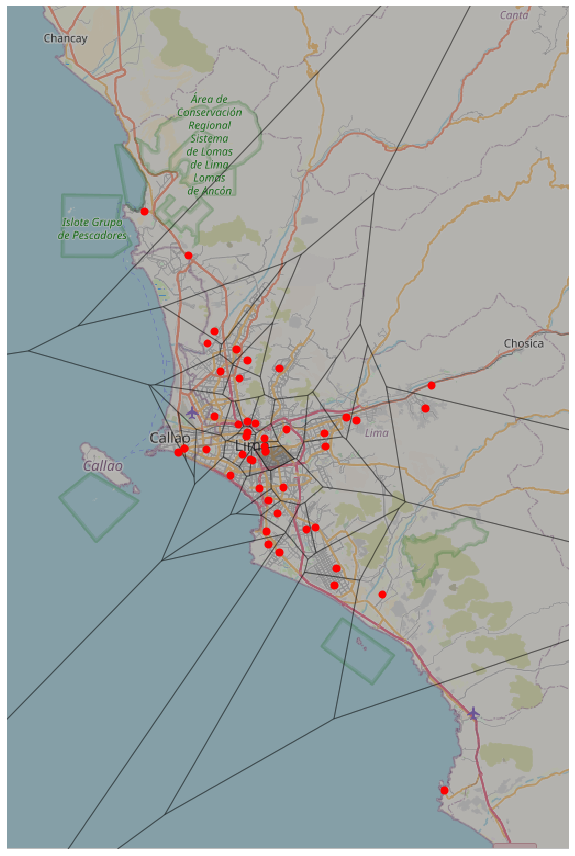

In [23]:
#ax = m.show_mpl(figsize=(14, 12))
x, y = m.to_pixels(lat, lon)
ax = m.show_mpl(figsize=(12, 12))
ax.plot(x, y, 'or', ms=6, mew=2);
#ax = m.show_mpl(figsize=(14, 12))

ax.add_collection(
    mpl.collections.PolyCollection(
        cells, facecolors=colors,
        edgecolors='k',  alpha=.35)) 
plt.savefig('Lima.png')

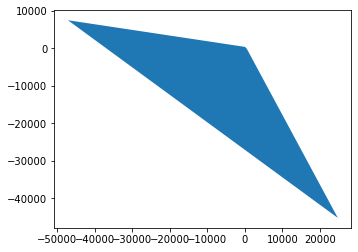

In [25]:
import geopandas
from geopandas import GeoSeries
from shapely.geometry import Polygon
p1 = Polygon([cells[1][0], cells[1][1], cells[1][2], cells[1][3], cells[1][4]])
g = GeoSeries([p1])
g.plot()

In [24]:
%%time
import osmnx as ox
lo1=[]
la1=[]
n1=46
for j in range(len(regions[n1])):
    n=regions[n1][j]
    s,t=vertices[n]
    lo1.append(s)
    la1.append(t)
    
norte=max(lo1)
sur=min(lo1)

este=max(la1)
oeste=min(la1)

print(norte, sur, este, oeste)
#minsur,minoeste, maxnorte, maxeste

-11.995686833575988 -12.056912322229078 -76.92357318180245 -76.97253567609825
Wall time: 998 µs


Ingrese la región a graficar: 0
to wait...


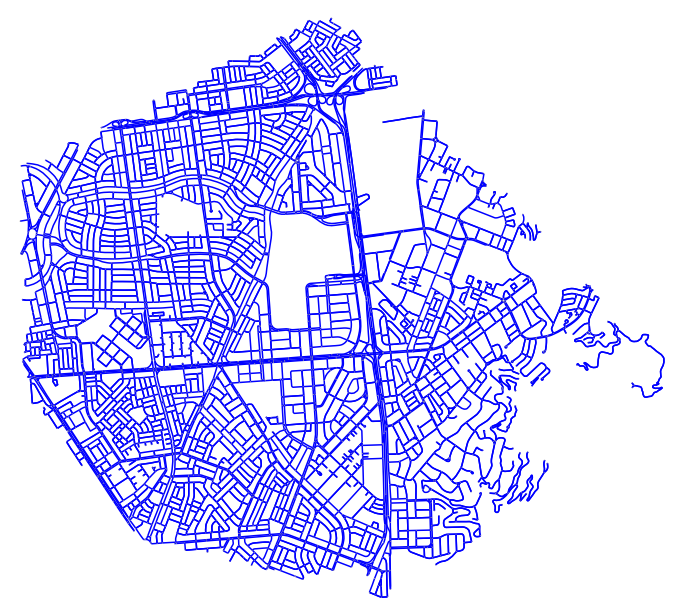

In [25]:
import osmnx as ox
from shapely.geometry import Polygon
from shapely import wkt

r=int(input('Ingrese la región a graficar: ' ))
j=len(regions[r])-1
print('to wait...')
v1=vertices[regions[r]]
cad =  str(v1[j][1])  + " "  + str(v1[j][0]) 
for i in range (len(regions[r])):
    cad = cad +  "," + str(v1[i][1]) + " " + str(v1[i][0])

cad = 'POLYGON (( ' + cad + '))'
    #if v1[i][0]<maxnorte:
#        np.delete(v1,i, axis=0)
#    else:
#        print(i)
#    if v1[i][0]>minsur:
#        np.delete(v1,i, axis=0)

polygon = wkt.loads( cad )
G1 = ox.graph_from_polygon( polygon , network_type='drive')
#cGARCES
fig, ax = ox.plot_graph(G1,  node_size=1, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='b', edge_linewidth=1.5, edge_alpha=1, fig_height=12, fig_width=12)
fig.savefig(ciudad + "0.tiff",   dpi=300, format="tiff")

In [26]:
%%time
import osmnx as ox
north, south, east, west =  -11.877768,  -11.971827, -77.036745,  -77.087982
G = ox.graph_from_bbox(north, south, east, west, network_type='drive')
north, south, east, west =  -11.941196,   -12.033841,  -77.027041,  -77.128350
G2 = ox.graph_from_bbox(north, south, east, west, network_type='drive')


Wall time: 29.2 s


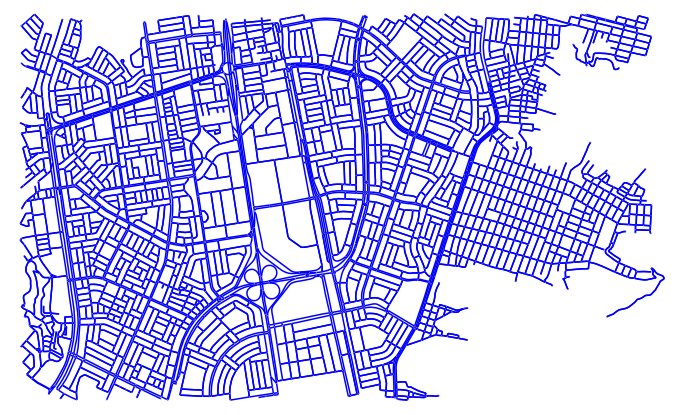

In [27]:

R=G.copy()
R.remove_nodes_from(n for n in G if n not in G2)
#R=intersection_all(G, G2)
fig, ax = ox.plot_graph(R,  node_size=1, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='b', edge_linewidth=1.5, edge_alpha=1, fig_height=12, fig_width=12)

In [29]:
import os
import geopandas as gpd
from shapely.geometry import Polygon
import folium
r=int(input('Ingrese la región a graficar: ' ))
j=len(regions[r])-1
print('to wait...')
a1=vertices[regions[r]]
cad1=[]
cad2=[]
cad1.append(a1[j][1])
cad2.append(a1[j][0])
for i in range (len(regions[r])):
    cad1.append(a1[i][1])
    cad2.append(a1[i][0])
    
lon_point_list = cad1
lat_point_list = cad2

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
print(polygon.geometry)
try: 
    os.remove("polygon.geojson")
except OSError:
    pass

polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")
m = folium.Map([-12.07737703, -76.98420679], zoom_start=5, tiles='cartodbpositron')
folium.GeoJson(polygon).add_to(m)
folium.LatLngPopup().add_to(m)
m

Ingrese la región a graficar: 1
to wait...
0    POLYGON ((-77.31719 -11.94541, -142.04740 -21....
Name: geometry, dtype: geometry


C:\Users\Guille\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Ingrese la región a graficar: 1
to wait...


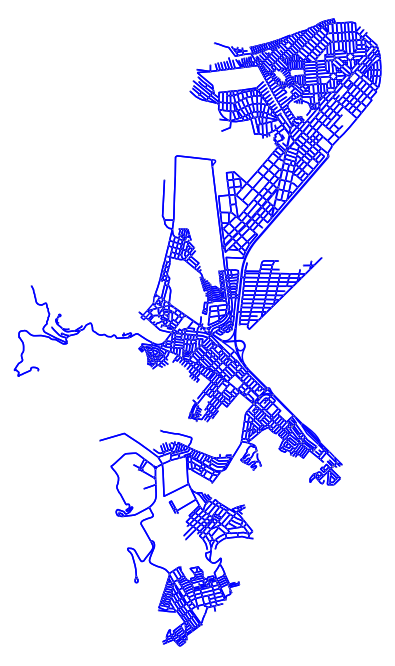

TypeError: must be str, not int

In [36]:
import osmnx as ox
from shapely.geometry import Polygon
from shapely import wkt
from osgeo import ogr
r=int(input('Ingrese la región a graficar: ' ))
j=len(regions[r])-1
print('to wait...')
v1=vertices[regions[r]]
cad =  str(v1[j][1])  + " "  + str(v1[j][0]) 
for i in range (len(regions[r])):
    cad = cad +  "," + str(v1[i][1]) + " " + str(v1[i][0])

cad = 'POLYGON (( ' + cad + '))'

wkt1 = cad
wkt2 = "POLYGON ((-77.195190 -11.705296, -76.886200 -11.784624, -76.611542 -12.042616, -76.711792 -12.565895 , -77.296814 -12.094991 , -77.350372  -11.713364, -77.195190 -11.705296)))"

poly1 = ogr.CreateGeometryFromWkt(wkt1)
poly2 = ogr.CreateGeometryFromWkt(wkt2)

intersection = poly1.Intersection(poly2)

polygon = wkt.loads( intersection.ExportToWkt() )
Gi = ox.graph_from_polygon(polygon , network_type='drive')
#cGARCES
fig, ax = ox.plot_graph(Gi,  node_size=1, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='b', edge_linewidth=1.5, edge_alpha=1, fig_height=12, fig_width=12)
fig.savefig(ciudad + "region_" + r + ".tiff",   dpi=300, format="tiff")